# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [158]:
# student 1: Nir 2537
# student 2: Bar 3026
# student 3: Shaked 6509

## Part 2 - Initial Preparations 
You could add as many code cells as needed

## Initial Stage:
<div class="alert alert-block alert-info">
    <li>Importing Relevant Libraries </li>
    <li>Loading data set and training set</li>
    <li>Presenting First Rows and Columns </li>
    <li>Exploratory Data Analysis (EDA)</li>
</div>

In [159]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

#### 
## <span style='background :yellow' > Loading Data, please wait for loading confirmation </span>

In [160]:
def find_csv_file(file_name):
    # List of common directories to search
    search_dirs = [
        os.path.expanduser('~'),  # Home directory
        os.path.expanduser('~/Downloads'),  # Downloads folder
        os.path.expanduser('~/Documents'),  # Documents folder
        os.getcwd(),  # Current working directory
    ]
    
    for directory in search_dirs:
        for root, dirs, files in os.walk(directory):
            if file_name in files:
                return os.path.join(root, file_name)
    
    raise FileNotFoundError(f"Could not find {file_name}")

try:
    # Find and read the train CSV
    train_file_path = find_csv_file('diabetes_train.csv')
    train_data = pd.read_csv(train_file_path)
    print(f"Train data loaded from: {train_file_path}")

    # Find and read the test CSV
    test_file_path = find_csv_file('diabetes_test.csv')
    test_data = pd.read_csv(test_file_path)
    print(f"Test data loaded from: {test_file_path}")
    print(f"Loading data completed, please continue")

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure the CSV files are in your home directory, Downloads folder, Documents folder, or the current working directory.")

Train data loaded from: C:\Users\barni\Downloads\Py_Sup_flow\diabetes_train.csv
Test data loaded from: C:\Users\barni\Downloads\Py_Sup_flow\diabetes_test.csv
Loading data completed, please continue


In [161]:
train_data.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,52.0,1.0,23.0,107.00,179.0,123.7,42.5,4.21,4.1589,93.0,50.0
1,22.0,1.0,18.6,97.00,114.0,57.6,46.0,2.00,3.9512,83.0,101.0
2,34.0,2.0,25.3,111.00,230.0,162.0,39.0,6.00,4.9767,90.0,181.0
3,38.0,2.0,26.8,105.00,181.0,119.2,37.0,5.00,4.8203,91.0,107.0
4,55.0,1.0,23.0,94.67,190.0,137.6,38.0,5.00,4.2767,106.0,146.0


In [162]:
test_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,60.0,2.0,28.2,112.0,185.0,113.8,42.0,4.0,4.9836,93.0,178.0
1,55.0,2.0,22.9,81.0,123.0,67.2,41.0,3.0,4.3041,88.0,129.0
2,46.0,1.0,20.6,73.0,172.0,107.0,51.0,3.0,4.2485,80.0,53.0
3,58.0,1.0,22.8,91.0,196.0,118.8,48.0,4.0,4.9836,115.0,206.0
4,36.0,2.0,24.1,112.0,193.0,125.0,35.0,6.0,5.1059,95.0,163.0


 
## <span style='background :yellow' > Exploratory Data Analysis (EDA) </span>

<div class="alert alert-block alert-info">
    <li>Basic Statistics for the Dataset</li>
    <li>Checking for Missing Values</li>
    <li>Visualization </li>
</div>

### <span style='background :yellow' > Basic Statistics for the Dataset
 </span>
 <div class="alert alert-block alert-info">
   <p>This step provides a statistical summary of the dataset</p>
       <p>The describe() function computes key statistics for each column(Count,Mean,Standard deviation,Min/Max/Percentiles)</p>
     <p>By looking at this summary, we can identify important characteristics of the dataset, such as whether any features have extreme values, if the data is balanced, and how spread out the values are</p>
</div>
 

In [163]:
train_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,48.433428,1.461756,26.365439,94.599518,189.977337,115.864306,50.228045,4.052635,4.636994,91.396601,152.243626
std,13.362376,0.499243,4.517617,14.118033,34.745332,30.427219,13.185724,1.292732,0.526080,11.340604,78.169016
min,19.000000,1.000000,18.000000,62.000000,110.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.000000,1.000000,23.100000,84.000000,165.000000,96.000000,40.000000,3.000000,4.276700,83.000000,85.000000
50%,50.000000,1.000000,25.700000,93.000000,187.000000,113.400000,49.000000,4.000000,4.595100,91.000000,140.000000
75%,59.000000,2.000000,29.200000,105.000000,213.000000,135.600000,58.000000,5.000000,4.976700,98.000000,212.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [164]:
train_data.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

<div class="alert alert-block alert-info">
    <p>This step checks for missing values in each column of the dataset</p>
</div>

## <span style='background :yellow' >Visualization </span>

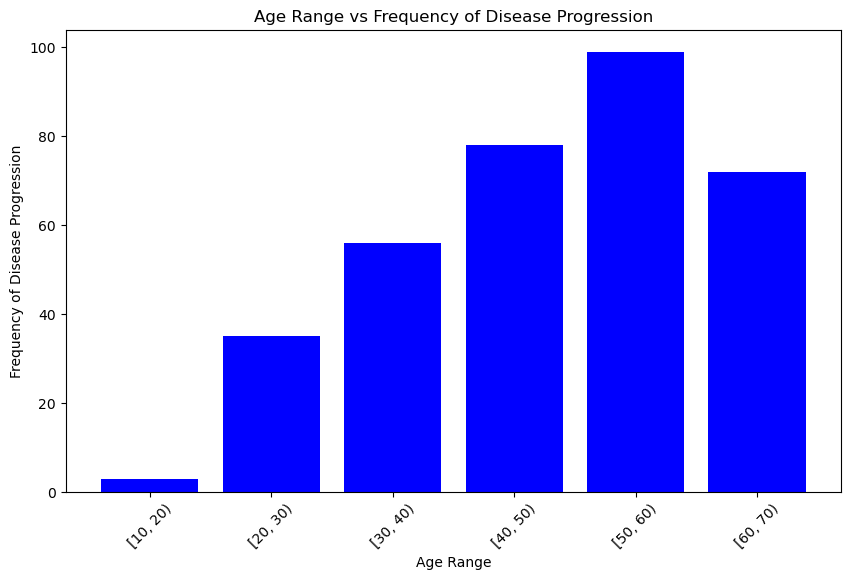

In [165]:
# Find the minimum and maximum age in the dataset
min_age = train_data['age'].min()
max_age = train_data['age'].max()

# Create age bins, but only for the range between min_age and max_age
age_bins = pd.cut(train_data['age'], bins=range(int(min_age // 10 * 10), int(max_age // 10 * 10) + 10, 10), right=False)

# Group by age bins and calculate the count of 'target' for each bin
age_vs_disease_binned = train_data.groupby(age_bins)['target'].count().reset_index()

# Filter out rows where 'target' count is zero
age_vs_disease_binned = age_vs_disease_binned[age_vs_disease_binned['target'] > 0]

# Convert age bins (Interval) to strings for better labeling
age_vs_disease_binned['age'] = age_vs_disease_binned['age'].astype(str)

# Plotting the frequency of disease progression by age range
plt.figure(figsize=(10, 6))
plt.bar(age_vs_disease_binned['age'], age_vs_disease_binned['target'], color='blue')
plt.title('Age Range vs Frequency of Disease Progression')
plt.xlabel('Age Range')
plt.ylabel('Frequency of Disease Progression')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">
<b>Purpose:  The bar plot visualizes the frequency of disease progression by age</b> 
</div>

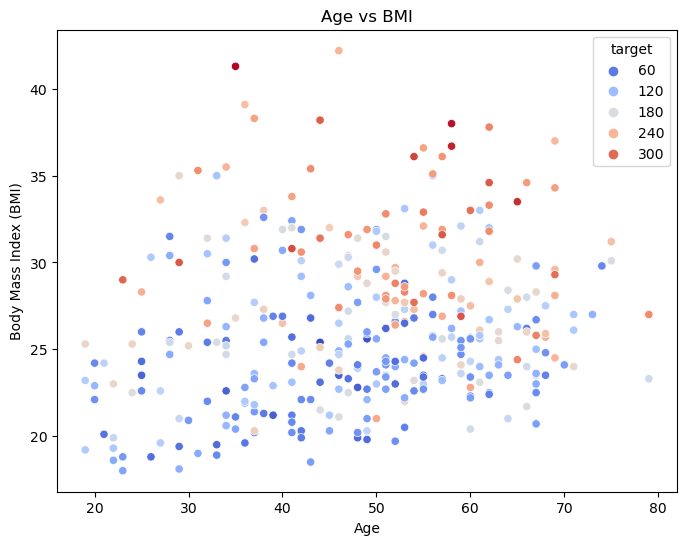

In [166]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bmi', data=train_data, hue='target', palette='coolwarm')
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('Body Mass Index (BMI)')
plt.show()


<div class="alert alert-block alert-success">
<b>Purpose:  This plot visualizes the relationship between two important variables: age and BMI</b> 
    <p>This visualization helps explore if there’s a relationship between age, BMI, and the disease progression</p>
    <h3>Conclusion: Younger individuals (under 70) with lower BMI tend to experience less disease progression</h3>
</div>

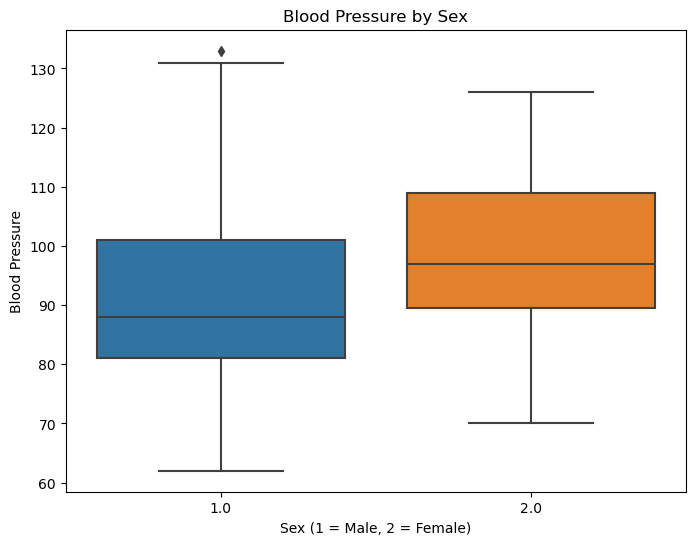

In [167]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='bp', data=train_data)
plt.title('Blood Pressure by Sex')
plt.xlabel('Sex (1 = Male, 2 = Female)')
plt.ylabel('Blood Pressure')
plt.show()


<div class="alert alert-block alert-success">
<b>Purpose: Visualizes if males or females tend to have higher or lower blood pressure on average.  </b>
     <lu>Conclusion:
<li>Females seem to have higher blood pressure levels</li>
    </lu>
</div>

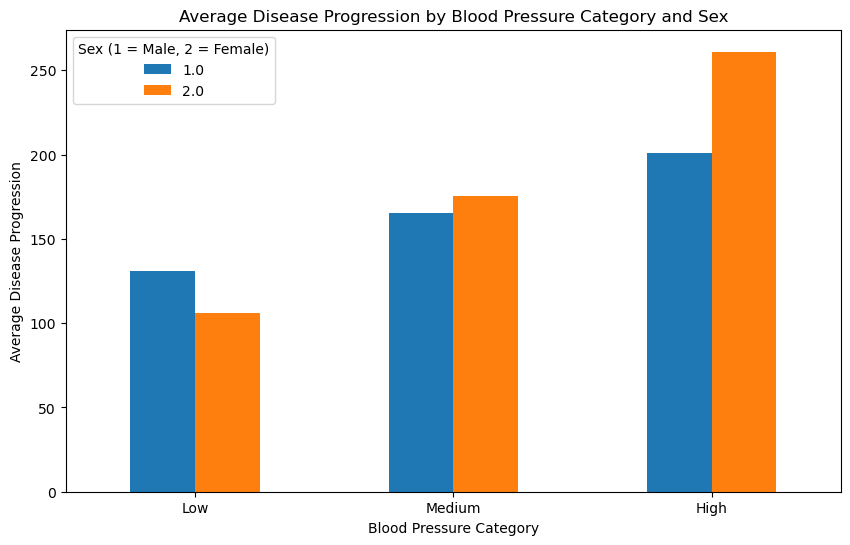

In [168]:
#Create a copy of the data for analysis and visualization
analysis_data = train_data.copy()

#Categorize blood pressure in the copied dataset
analysis_data['bp_category'] = pd.cut(analysis_data['bp'], bins=[0, 90, 120, np.inf], labels=['Low', 'Medium', 'High'])

#Perform the analysis or visualization on the copied dataset
bp_sex_grouped = analysis_data.groupby(['bp_category', 'sex'])['target'].mean().unstack()

bp_sex_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Average Disease Progression by Blood Pressure Category and Sex')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Average Disease Progression')
plt.legend(title='Sex (1 = Male, 2 = Female)')
plt.xticks(rotation=0)
plt.show()

<div class="alert alert-block alert-success">
<b>Purpose: </b> 
    <p>The bar plot shows the average disease progression for each blood pressure category (low, medium, high) separated by sex.</p>
    <lu>Conclusion:
    <li>Males may be more prone to disease progression at lower blood pressure levels</li>
<li>Females seem to have more disease progression at higher blood pressure levels</li>
    </lu>
                                                                                
</div>

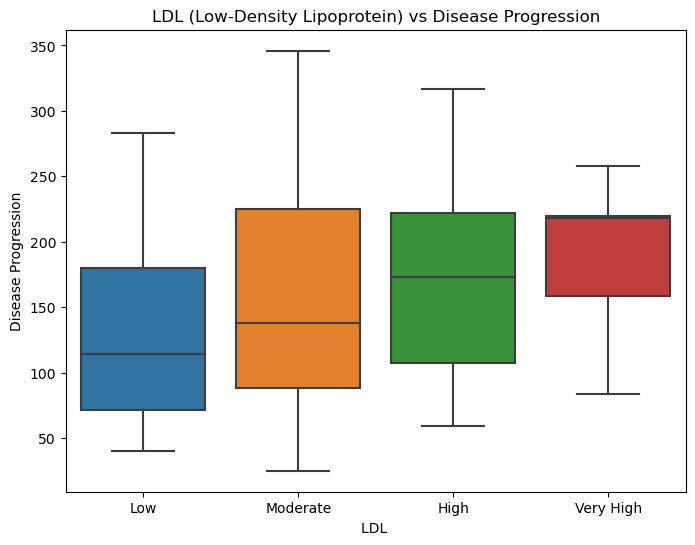

In [169]:
# Step 1: Create a copy of the dataset for analysis and visualization
analysis_data = train_data.copy()

# Step 2: Categorize LDL (s2) levels in the copied dataset
analysis_data['ldl_category'] = pd.cut(analysis_data['s2'], bins=4, labels=['Low', 'Moderate', 'High', 'Very High'])

# Step 3: Perform the visualization on the copied dataset
plt.figure(figsize=(8, 6))
sns.boxplot(x='ldl_category', y='target', data=analysis_data)
plt.title('LDL (Low-Density Lipoprotein) vs Disease Progression')
plt.xlabel('LDL ')
plt.ylabel('Disease Progression')
plt.show()

# Step 4: Continue using the original `train_data` for machine learning
# This ensures the numeric columns remain untouched for the regression models



<div class="alert alert-block alert-success">
<b>Purpose: </b> 
    <p>The plot shows the relationship between LDL and disease progression </p>
    <lu><b> Conclusion:</b> 
    Higher LDL levels seem to be associated with greater disease progression, but not consistently across all LDL levels. It suggests that while LDL does play a role in disease progression, and therefore isn't reliable.</p>
    </lu>
                                                                                
</div>



## Part 3 - Experiments
You could add as many code cells as needed

## <span style='background :yellow' > Cross-validation with 5-Fold Cross Validation and Grid Search </span>


<div class="alert alert-block alert-info">
    <p>The main purpose is to find the best combination of model, feature engineering, and hyperparameters for the regression.
        We will use cross validation to ensure the model doesent rely too heavily on one dataset and performs well across different datasets</p>
    
</div>

<div class="alert alert-block alert-info">
    <b>Imports:</b>
</div>



In [170]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import OrthogonalMatchingPursuit, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

<div class="alert alert-block alert-info">
    <b>Finding the Best Model:</b>
    <p>R<sup>2</sup> (R-squared) measures how well the model explains the variance in the target variable. The closer R<sup>2</sup> is to 1, the better the model fits the data.</p>
    <b>Models tested:</b>
    <ul>
        <li><b>Ridge Regression</b>: A linear model with L2 regularization.</li>
        <li><b>Lasso Regression</b>: A linear model with L1 regularization.</li>
        <li><b>Random Forest</b>: A tree-based ensemble method that reduces overfitting by averaging multiple decision trees.</li>
        <li><b>Gradient Boosting</b>: An ensemble method that builds models sequentially, with each new model correcting errors from the previous one.</li>
        <li><b>Orthogonal Matching Pursuit (OMP)</b>: A sparse linear model that selects a subset of the most important features iteratively, optimizing performance with few non-zero coefficients.</li>
    </ul>
</div>


In [171]:
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

# One-Hot Encode the categorical columns for train and validation sets
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Get the number of features in the dataset after polynomial expansion
n_features = X_train_encoded.shape[1]  # Number of original features (excluding 's2')

# Ensure n_nonzero_coefs doesn't exceed the number of available features
n_nonzero_coefs_range = [min(n, n_features) for n in [5, 10, 20, 50]]

# Function to run model with GridSearchCV and handle failed fits
def run_grid_search(pipe, param_grid, X, y, model_name):
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1, error_score='raise')
    try:
        grid_search.fit(X, y)
        best_r2 = grid_search.best_score_
    except ValueError as e:
        print(f"Error encountered for model {model_name}: {e}")
        best_r2 = None  # Assign None to mark this model as having failed
    return best_r2

# Define pipelines and parameter grids for each model
pipelines_params = [
    {
        "name": "Ridge Regression",
        "pipe": Pipeline([
            ('scaler', MinMaxScaler()),  # Trying different scaler
            ('poly', PolynomialFeatures(degree=2)),
            ('ridge', Ridge())
        ]),
        "param_grid": {
            'ridge__alpha': [0.1, 1.0, 10.0, 100.0],  # Extended range
            'poly__degree': [2, 3],  # Testing polynomial degrees 2 and 3
            'ridge__max_iter': [10000],
            'ridge__tol': [1e-4]
        }
    },
    {
        "name": "Lasso Regression",
        "pipe": Pipeline([
            ('scaler', MinMaxScaler()),  # Trying MinMaxScaler
            ('poly', PolynomialFeatures(degree=2)),
            ('lasso', Lasso())
        ]),
        "param_grid": {
            'lasso__alpha': [0.01, 0.1, 1.0, 10.0],  # Adjusted alpha values
            'poly__degree': [2, 3],
            'lasso__max_iter': [10000],
            'lasso__tol': [1e-4]
        }
    },
    {
        "name": "Random Forest",
        "pipe": Pipeline([
            ('scaler', RobustScaler()),  # Keeping RobustScaler for Random Forest
            ('rf', RandomForestRegressor(random_state=42))
        ]),
        "param_grid": {
            'rf__n_estimators': [50, 100, 200],  # Increased range of trees
            'rf__max_depth': [10, 20, 30],  # Testing higher max_depth
            'rf__min_samples_split': [2, 5],
            'rf__min_samples_leaf': [1, 2]
        }
    },
    {
        "name": "Gradient Boosting",
        "pipe": Pipeline([
            ('scaler', RobustScaler()),  # Using RobustScaler
            ('gbm', GradientBoostingRegressor(random_state=42))
        ]),
        "param_grid": {
            'gbm__n_estimators': [100, 200, 300],  # Increase the number of estimators
            'gbm__learning_rate': [0.01, 0.05, 0.1],  # Testing additional learning rates
            'gbm__max_depth': [3, 5, 7]  # Testing deeper trees
        }
    },
    {
        "name": "Orthogonal Matching Pursuit",
        "pipe": Pipeline([
            ('scaler', StandardScaler()),  # Using StandardScaler for OMP
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Testing degree 2 for interactions
            ('omp', OrthogonalMatchingPursuit())
        ]),
        "param_grid": {
            'omp__n_nonzero_coefs': n_nonzero_coefs_range,  # Valid range for OMP
            'poly__degree': [1, 2, 3]  # Testing both simple and complex interactions
        }
    }
]

# Run grid search for each model and handle errors
best_scores = {}
for model in pipelines_params:
    best_r2 = run_grid_search(model["pipe"], model["param_grid"], X_train_encoded, y_train, model["name"])
    if best_r2 is not None:  # Only include models that didn't fail
        best_scores[model["name"]] = best_r2

# Create a DataFrame and sort by R-squared values in descending order
summary_df = pd.DataFrame({
    'Model': [k for k in best_scores],
    'Best R² Score': [v for v in best_scores.values()]
}).sort_values(by='Best R² Score', ascending=False)

# Find and print the best model and its R² score
best_model_row = summary_df.iloc[0]  # First row is now the best model after sorting
print(f"\nThe model with the best R-squared is: {best_model_row['Model']} with R² = {best_model_row['Best R² Score']:.4f}")

# Print the sorted DataFrame (this is sufficient; no need for extra print statements before)
summary_df



The model with the best R-squared is: Orthogonal Matching Pursuit with R² = 0.5018


,Model,Best R² Score
4,Orthogonal Matching Pursuit,0.501818
0,Ridge Regression,0.495519
1,Lasso Regression,0.485103
2,Random Forest,0.448316
3,Gradient Boosting,0.447453


<div class="alert alert-block alert-success">
    <b>Best Model:</b>
    <ul>
        <li><b>Orthogonal Matching Pursuit</b> achieved the highest R² score of 0.5018, indicating it provides the best balance between fit and generalization among the models tested.</li>
    </ul>
</div>


<div class="alert alert-block alert-info">
    <b>Optimizing OMP and feature engineering:</b>
    <ul>
        <li>Since OMP is dynamic and iterative, we can experiment further to find beter OMP combinations:</li>
    </ul>
</div>


In [172]:
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

# One-Hot Encode the categorical columns for train and validation sets
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Split the data into train and validation sets for feature engineering
X_train_full, X_val, y_train_full, y_val = train_test_split(X_train_encoded, y_train, test_size=0.2, random_state=42)

# Re-encode the validation set to match the training set
X_val_encoded = pd.get_dummies(X_val, drop_first=True).reindex(columns=X_train_encoded.columns, fill_value=0)

# ------------------ OMP with Polynomial Features ------------------
# Create polynomial features and get feature names
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_transformer.fit_transform(X_train_encoded)
feature_names_poly = poly_transformer.get_feature_names_out(X_train_encoded.columns)

# Create the pipeline for OMP with polynomial features
pipeline_poly = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('omp', OrthogonalMatchingPursuit(n_nonzero_coefs=10))  # OMP Model
])

# Fit the pipeline and predict
cross_val_r2_poly = cross_val_score(pipeline_poly, X_train_poly, y_train, cv=5, scoring='r2', n_jobs=-1)
pipeline_poly.fit(X_train_poly, y_train)
y_val_poly = poly_transformer.transform(X_val_encoded)
y_val_pred_poly = pipeline_poly.predict(y_val_poly)
r2_val_poly = r2_score(y_val, y_val_pred_poly)

# Extract the selected features from the OMP model (based on non-zero coefficients)
omp_coefficients = pipeline_poly.named_steps['omp'].coef_

# Sort the selected features by the absolute value of the coefficients
sorted_feature_indices = np.argsort(np.abs(omp_coefficients))[::-1]
top_2_indices = sorted_feature_indices[:2]  # Select only the top 2 feature indices

# Get the names of the top 2 features
omp_selected_features_poly_top2 = [feature_names_poly[i] for i in top_2_indices]

# ------------------ OMP with Interaction Terms ------------------
poly_transformer_interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interaction = poly_transformer_interaction.fit_transform(X_train_encoded)
feature_names_interaction = poly_transformer_interaction.get_feature_names_out(X_train_encoded.columns)

pipeline_interaction = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('omp', OrthogonalMatchingPursuit(n_nonzero_coefs=10))  # OMP Model
])

cross_val_r2_interaction = cross_val_score(pipeline_interaction, X_train_interaction, y_train, cv=5, scoring='r2', n_jobs=-1)
pipeline_interaction.fit(X_train_interaction, y_train)
y_val_interaction = poly_transformer_interaction.transform(X_val_encoded)
y_val_pred_interaction = pipeline_interaction.predict(y_val_interaction)
r2_val_interaction = r2_score(y_val, y_val_pred_interaction)

# ------------------ OMP with PCA ------------------
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('pca', PCA(n_components=5)),  # PCA for dimensionality reduction
    ('omp', OrthogonalMatchingPursuit(n_nonzero_coefs=5))  # OMP Model
])

cross_val_r2_pca = cross_val_score(pipeline_pca, X_train_encoded, y_train, cv=5, scoring='r2', n_jobs=-1)
pipeline_pca.fit(X_train_encoded, y_train)
y_val_pred_pca = pipeline_pca.predict(X_val_encoded)
r2_val_pca = r2_score(y_val, y_val_pred_pca)

# ------------------ Summary of Feature Engineering Experiments ------------------
results = pd.DataFrame({
    'Model': ['OMP with Polynomial Features', 'OMP with Interaction Terms', 'OMP with PCA'],
    'Cross-validated R² Score': [cross_val_r2_poly.mean(), cross_val_r2_interaction.mean(), cross_val_r2_pca.mean()],
    'R² Score on Validation Set': [r2_val_poly, r2_val_interaction, r2_val_pca]
}).sort_values(by='Cross-validated R² Score', ascending=False)

# Print the sorted results
results

,Model,Cross-validated R² Score,R² Score on Validation Set
0,OMP with Polynomial Features,0.488480,0.534123
2,OMP with PCA,0.487610,0.476875
1,OMP with Interaction Terms,0.483593,0.521666


In [173]:
# ------------------ Best Model Evaluation ------------------
best_model = 'OMP with Polynomial Features'
best_cross_val_r2 = results[results['Model'] == best_model]['Cross-validated R² Score'].values[0]
best_val_r2 = results[results['Model'] == best_model]['R² Score on Validation Set'].values[0]

# Output the best model and its performance
print(f"\nBest model (selected for balance): {best_model} with Cross-validated R² = {best_cross_val_r2:.4f} and Validation R² = {best_val_r2:.4f}.")

# ------------------ Return Best Features ------------------
# Display top 2 features
print(f"\nTop 2 selected feature interactions for {best_model}:")
print(omp_selected_features_poly_top2)


Best model (selected for balance): OMP with Polynomial Features with Cross-validated R² = 0.4885 and Validation R² = 0.5341.

Top 2 selected feature interactions for OMP with Polynomial Features:
['age', 'sex s1']



<div class="alert alert-block alert-success">
    <b>Best Model:</b>
    <ul>
        <li><b>OMP  with Polynomial Features</b> achieved the highest R² score of <b>0.5341</b> on the validation set, providing the best balance between fit and generalization among the models tested.</li>
    </ul>

<b>Best features after feature engineering</b>
    <li>'age'</li>
    <li>interaction between 'sex' and 's1'</li>
    <li>'s2' was found as unreliable and is dropped before predictions (pre-proccessing)</li>

<div class="alert alert-block alert-info">
    <b>Finding best Hyperparameters</b>
    <ul>
        <li>Experimenting to find best hyperparameters for Orthogonal Matching Pursuit (best model)</li>
    </ul>
</div>



In [174]:
pipeline_poly = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('poly', PolynomialFeatures()),  # Polynomial Features
    ('omp', OrthogonalMatchingPursuit(n_nonzero_coefs=None))  # OMP Model
])

# Define the parameter grid for hyperparameter tuning
param_grid_poly = {
    'poly__degree': [1, 2],  # Testing polynomial degrees 1 and 2
    'omp__n_nonzero_coefs': [5, 10]  # Testing different non-zero coefficients
}

# Perform grid search to find the best hyperparameters
grid_search_poly = GridSearchCV(pipeline_poly, param_grid_poly, cv=5, scoring='r2', n_jobs=-1, error_score='raise')
grid_search_poly.fit(X_train_scaled, y_train_full)

# Extract the best R² score and hyperparameters for OMP with polynomial features
best_poly_r2 = grid_search_poly.best_score_
best_poly_params = grid_search_poly.best_params_

# Predict on the validation set using the best estimator found
y_val_pred_poly = grid_search_poly.best_estimator_.predict(X_val_scaled)
r2_val_poly = r2_score(y_val, y_val_pred_poly)

# Print results
print(f"Best Hyperparameters for OMP with Polynomial Features: {best_poly_params}")
print(f"Best Cross-validated R² for OMP with Polynomial Features: {best_poly_r2:.4f}")
print(f"R² on the validation set (OMP with Polynomial Features): {r2_val_poly:.4f}")

Best Hyperparameters for OMP with Polynomial Features: {'omp__n_nonzero_coefs': 5, 'poly__degree': 1}
Best Cross-validated R² for OMP with Polynomial Features: 0.4828
R² on the validation set (OMP with Polynomial Features): 0.4651


<div class="alert alert-block alert-success">
    <b>Best Hyperparameters:</b>
    <ul>
        <li>Best Hyperparameters found while using OMP with Polynomial Features are: </li>
        <li>non-zero coefficients = 5, polynomial degree = 1 </li>
    </ul>
</div>


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

<span style='background :yellow' > Use OMP with Polynomial Features, degree = 1 and non-zero coefficients = 5 (best found model) to re-train the model</span>

In [175]:
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

# Best hyperparameters found during experimentation
best_poly_degree = 1  # Best degree from previous search
best_n_nonzero_coefs = 5  # Best number of non-zero coefficients

# We fit the PolynomialFeatures object separately to capture the feature names correctly
poly_transformer = PolynomialFeatures(degree=best_poly_degree, include_bias=False)

# Transform X_train with PolynomialFeatures
X_train_poly = poly_transformer.fit_transform(X_train)

# Pipeline with StandardScaler and OrthogonalMatchingPursuit (using the transformed features)
pipeline_best = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the features
    ('omp', OrthogonalMatchingPursuit(n_nonzero_coefs=best_n_nonzero_coefs))  # Best n_nonzero_coefs found
])

# Retrain the model on the polynomial transformed training set
pipeline_best.fit(X_train_poly, y_train)

# Predict on the training set to calculate R²
y_train_pred = pipeline_best.predict(X_train_poly)

# Calculate R² score on the full training set
r2_train = r2_score(y_train, y_train_pred)

# Output the results
print(f"Model has been retrained on the full training set using the best hyperparameters.")
print(f"R² score on the full training set: {r2_train:.4f}")

Model has been retrained on the full training set using the best hyperparameters.
R² score on the full training set: 0.5140


## Part 5 - Apply on test and show model performance estimation

In [176]:
# Drop 's2' from the training data (as done previously)
X_train = train_data.drop(columns=['target', 's2'])  # Removing 's2' column during training
y_train = train_data['target']

# If 's2' exists in the test set but was dropped during training, drop 's2' from the test set
if 's2' in X_test.columns:
    X_test = X_test.drop(columns=['s2'])

# Best combination from previous experimentation
best_poly_degree = 1
best_n_nonzero_coefs = 5

# Feature engineering: Polynomial features with the best degree
pipeline_best = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the features
    ('poly', PolynomialFeatures(degree=best_poly_degree, include_bias=False)),  # Best degree
    ('omp', OrthogonalMatchingPursuit(n_nonzero_coefs=best_n_nonzero_coefs))  # OMP with the best n_nonzero_coefs
])

# Retrain the model on the full training set
pipeline_best.fit(X_train, y_train)

# Now that the model is fitted, predict on the test set
y_test_pred = pipeline_best.predict(X_test)

# Calculate R score on the test set
r2_test = r2_score(y_test, y_test_pred)

# Calculate residuals (difference between true and predicted values)
residuals = y_test - y_test_pred

# Define standard deviation of the target variable in the test set
std_test_set = y_test.std()

# Define threshold as a percentage of the standard deviation
threshold_percentage = 50  # Set the threshold here (50% of std by default)

# Calculate how much each residual is as a percentage of the standard deviation
percentage_outside_std = residuals.apply(
    lambda x: abs(x) / std_test_set * 100 if abs(x) > (threshold_percentage / 100 * std_test_set) else 0
)

# Create a DataFrame to display true values, predicted values, and residuals for the first 5 predictions
results_df = pd.DataFrame({
    'True Values': y_test.values[:5],
    'Predicted Values': y_test_pred[:5],
    'Residuals': residuals[:5],
    'Percentage Outside Std (%)': percentage_outside_std[:5]
})

# Calculate mean absolute residual (MAR)
mean_residual = residuals.abs().mean()

# Calculate how many predictions have residuals within the margin of error (standard deviation)
within_margin = sum(residuals.abs() <= std_test_set)
total_predictions = len(y_test)
percentage_within_margin = (within_margin / total_predictions) * 100

# Display the R score, standard deviation, and mean residual
print(f"R² score on the test set: {r2_test:.4f}")
print(f"Standard deviation of the target variable (test set): {std_test_set:.4f}")
print(f"Mean Absolute Residual: {mean_residual:.4f}")

# Display how many predictions are within the margin of error
print(f"Number of predictions within the margin of error (standard deviation): {within_margin} out of {total_predictions}")
print(f"Percentage of predictions within margin: {percentage_within_margin:.2f}%")

# Display the first 5 predictions DataFrame
results_df

R² score on the test set: 0.4767
Standard deviation of the target variable (test set): 73.0915
Mean Absolute Residual: 43.9145
Number of predictions within the margin of error (standard deviation): 72 out of 89
Percentage of predictions within margin: 80.90%


,True Values,Predicted Values,Residuals,Percentage Outside Std (%)
0,178.0,195.736969,-17.736969,0.000000
1,129.0,102.570197,26.429803,0.000000
2,53.0,85.759734,-32.759734,0.000000
3,206.0,153.972696,52.027304,71.181023
4,163.0,184.572346,-21.572346,0.000000


<div class="alert alert-block alert-success">
    <h4>Model Conclusion</h4>
    <p>
        While the R² score on the test dataset is close to 0.5 (and was higher than 0.5 on the training set), it is not as high as expected. 
        However, it is important to note that <b>80.9%</b> of the predictions had an error 
        value (residuals) within the standard deviation, which indicates that the majority of 
        predictions were fairly accurate. 
    </p>
    <p>
        Additionally, the <b>Mean Absolute Residual</b> is well within the standard deviation, 
        suggesting that the model's performance is <b>adequate</b> despite the moderate R² score.
    </p>
</div>

<div class="alert alert-block" style="background-color: orange;">
    <h4>Summary of correlations found in the data:</h4>
    <ul>
        <li><strong>Age vs Disease Progression (Count-based):</strong> Older age groups tend to have a higher frequency of disease progression.</li>
        <li><strong>BMI vs Disease Progression:</strong> Higher BMI is associated with a greater risk of disease progression. This correlation is evident when comparing individuals of the same age with varying BMI levels.</li>
        <li><strong>Blood Pressure vs Disease Progression by Sex:</strong> The data shows that females generally have higher blood pressure, and those with higher blood pressure tend to have increased disease progression.</li>
        <li><strong>LDL (Low-Density Lipoprotein) vs Disease Progression:</strong> Higher LDL levels are associated with more severe disease progression, although this relationship is not perfectly linear across all LDL categories.</li>
        <li><strong>Blood Pressure Categories:</strong> Males tend to show more progression at lower blood pressure levels, while females show more progression at higher blood pressure levels.</li>
    </ul>
</div>
